# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [13]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985
...,...,...,...,...,...,...,...
9019,79399,Unincorporated NT,IEO,Index of Education and Occupation,URP,Usual resident population,7982
9020,89399,Unincorporated ACT,IEO,Index of Education and Occupation,SCORE,Score,1051
9021,89399,Unincorporated ACT,IEO,Index of Education and Occupation,MINS,Minimum score for SA1s in area,569
9022,89399,Unincorporated ACT,IEO,Index of Education and Occupation,MAXS,Maximum score for SA1s in area,1263


In [14]:
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-14-82c84bc46bf9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [15]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [7]:
LGA_scores[LGA_scores.index == "ONKAPARINGA"]

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ONKAPARINGA,996.0,996.0,975.0,993.0


In [8]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.tail()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
YASS VALLEY,1088.0,1088.0,1064.0,1061.0,15025.0
YILGARN,998.0,998.0,969.0,984.0,1642.0
YORK,1010.0,1010.0,975.0,983.0,3379.0
YORKE PENINSULA,969.0,969.0,933.0,952.0,11046.0
YOUNG,964.0,964.0,936.0,947.0,12238.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [9]:
# Join 'Participant_LGA' from LGA_scores with sa_vouchers
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.tail()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
127521,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,15/8/16 1:33,2016,965.0,965.0,917.0,937.0,8134.0
127522,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,13/7/15 23:42,2015,965.0,965.0,917.0,937.0,8134.0
127523,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,30/6/17 6:07,2017,965.0,965.0,917.0,937.0,8134.0
127524,1127526,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,28/4/15 0:06,2015,965.0,965.0,917.0,937.0,8134.0
127525,1127526,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,29/3/16 23:57,2016,965.0,965.0,917.0,937.0,8134.0


# Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

In [129]:
# Grouped Data Frame for Participant LGA
df = pd.read_csv("files/sportsvouchersclaimed.csv")
LGA_result = df.groupby(by=["Participant_LGA"]).sum()
print(LGA_result.shape)
LGA_result.describe()

(69, 3)


,Participant_ID,Voucher_Value,Voucher_Claim_Year
count,6.900000e+01,69.000000,6.900000e+01
mean,1.966052e+09,91789.057971,3.725820e+06
std,2.493684e+09,117311.629358,4.732666e+06
min,3.971480e+07,1950.000000,7.864700e+04
25%,3.630130e+08,16650.000000,6.894370e+05
50%,1.068995e+09,50140.000000,2.036021e+06
75%,2.343707e+09,110740.000000,4.465180e+06
max,1.358440e+10,638315.000000,2.576723e+07


In [11]:
# Lowest Voucher Usage according to Participant LGA
LGA_result.sort_values(by=['Voucher_Claim_Year']).head(10)

,Participant_ID,Voucher_Value,Voucher_Claim_Year
Participant_LGA,,,
COOBER PEDY,39714799,1950,78647
PETERBOROUGH,49117535,2140,90721
FLINDERS RANGES,111192322,4950,205612
ORROROO/CARRIETON,147688351,5870,276193
FRANKLIN HARBOUR,158415668,7750,312431
ELLISTON,172053766,7585,332606
ROBE,181694884,8310,336665
MOUNT REMARKABLE,219465011,9960,413262
KIMBA,244059924,10685,467745


In [12]:
# Highest Voucher Usage according to Participant LGA
LGA_result.sort_values(by=['Voucher_Claim_Year']).tail(10)

,Participant_ID,Voucher_Value,Voucher_Claim_Year
Participant_LGA,,,
MOUNT BARKER,3673880686,172910,6993194
MITCHAM,4847862244,233098,9398317
ADELAIDE HILLS,4999089570,237570,9587113
MARION,5668173890,264383,10666429
PORT ADELAIDE ENFIELD,6791557572,316253,12869423
CHARLES STURT,7386420418,343494,13903612
PLAYFORD,7172179977,346435,13990982
TEA TREE GULLY,7678199127,360860,14552780
SALISBURY,8780873055,407530,16468421


<AxesSubplot:xlabel='Participant_LGA'>

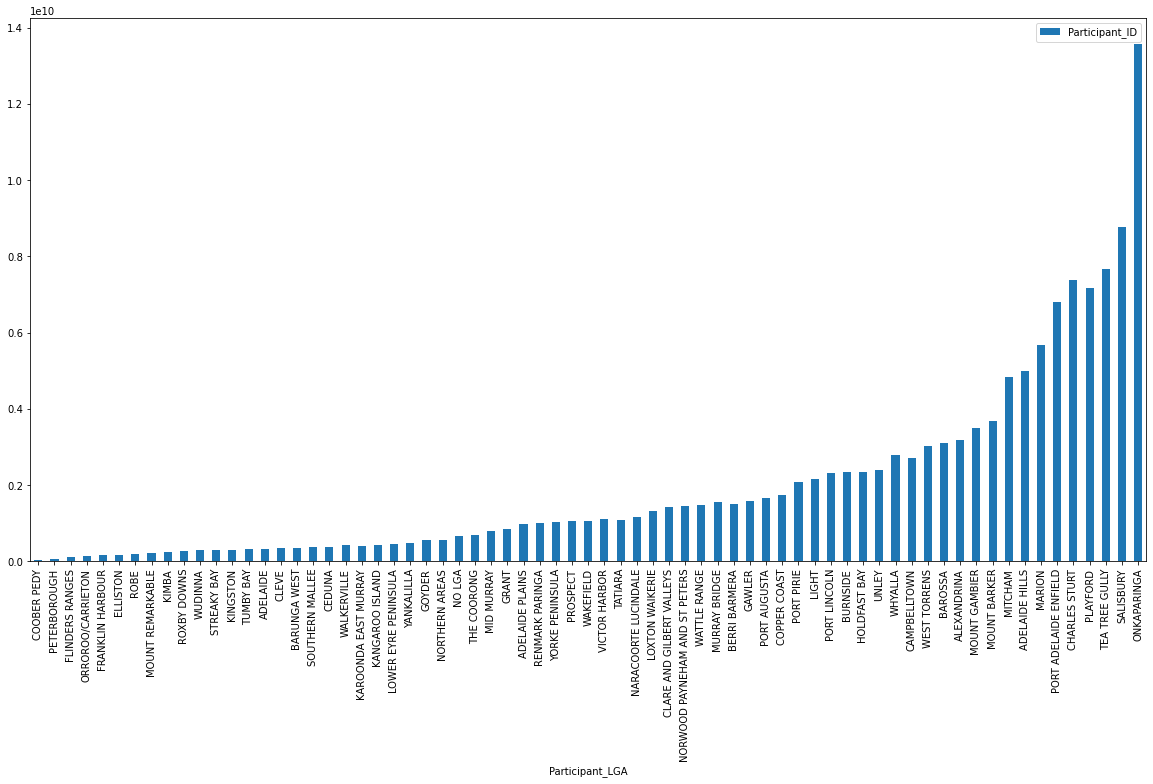

In [123]:
LGA_result.sort_values(by=['Voucher_Claim_Year']).plot.bar(y='Participant_ID', figsize=(20,10))

<AxesSubplot:xlabel='Participant_LGA'>

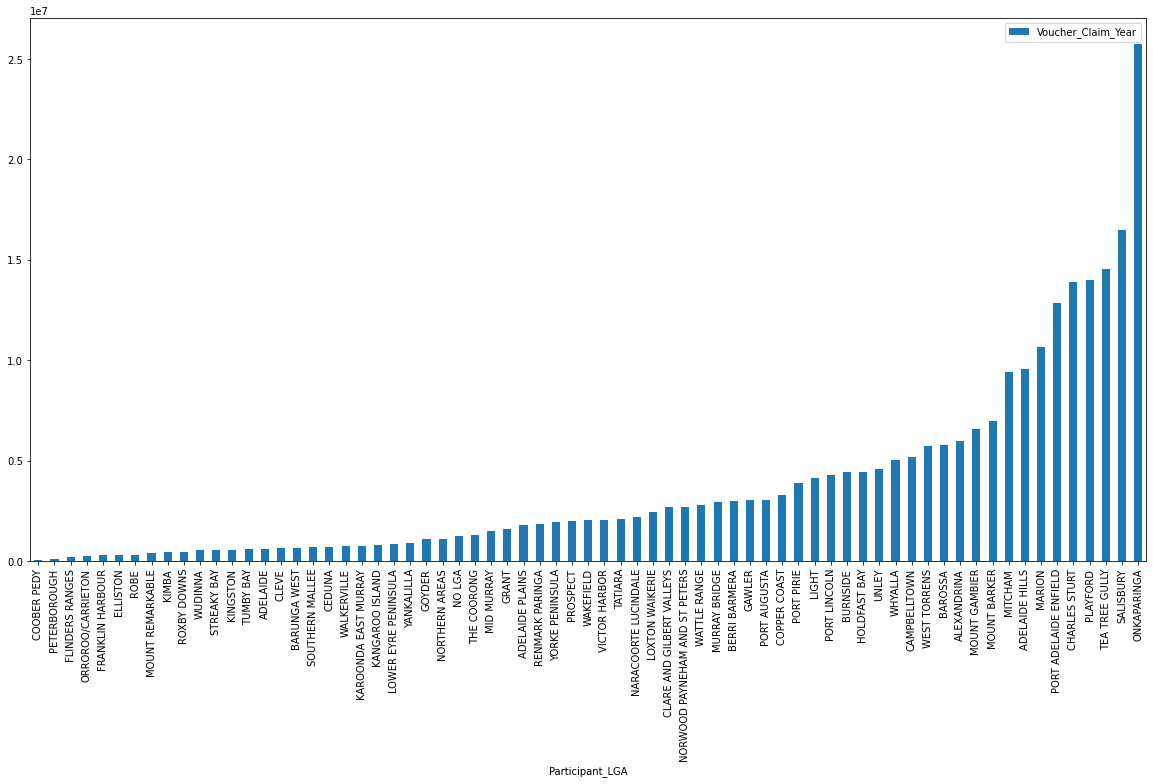

In [122]:
LGA_result.sort_values(by=['Voucher_Claim_Year']).plot.bar(y='Voucher_Claim_Year', figsize=(20,10))

As we see, Onkaparinga had the highest voucher claim and participants among the participant LGA which was 25767228 and 13584403317 respectively.


In [128]:
# Grouped Data Frame for Sport
Sport_result = df.groupby(by=["Voucher_Sport"]).sum()
print(Sport_result.shape)
Sport_result.describe()

(50, 3)


,Participant_ID,Voucher_Value,Voucher_Claim_Year
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.713151e+09,1.266689e+05,5.141632e+06
std,8.211287e+09,3.834578e+05,1.557171e+07
min,2.062641e+06,1.000000e+02,4.030000e+03
25%,2.748539e+07,1.287500e+03,5.190225e+04
50%,1.338530e+08,5.925000e+03,2.550445e+05
75%,9.533498e+08,4.477000e+04,1.811784e+06
max,5.018182e+10,2.346385e+06,9.520430e+07


In [14]:
# Lowest Voucher Usage according to Sport
Sport_result.sort_values(by=['Voucher_Claim_Year']).head(10)

,Participant_ID,Voucher_Value,Voucher_Claim_Year
Voucher_Sport,,,
Kung Fu (Wu Shu),2115046,100,4030
Bowls,2213112,100,4031
Dancesport,2062641,100,4031
Paralympics,3268919,150,6045
Badminton,4328636,200,8060
Shooting,4301390,140,8064
Weightlifting,4154214,200,8064
Surf Riding,16035562,750,30243
Pony Clubs,18239394,850,34266


In [15]:
# Highest Voucher Usage according to Sport
Sport_result.sort_values(by=['Voucher_Claim_Year']).tail(10)

,Participant_ID,Voucher_Value,Voucher_Claim_Year
Voucher_Sport,,,
Cricket,1988914673,93750,3779655
Calisthenics,2680550004,126100,5084297
Hockey,3243407472,148334,6099796
Tennis,3958646567,185650,7542952
Athletics,4808922189,225865,9106340
Basketball,6457574767,298445,12126651
Gymnastics,10457325199,491135,19803588
Football (Soccer),16784656471,788740,31800849
Netball,25549319810,1183334,48415549


In [130]:
Sport_result.sort_values(by=['Voucher_Claim_Year']).describe()

,Participant_ID,Voucher_Value,Voucher_Claim_Year
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.713151e+09,1.266689e+05,5.141632e+06
std,8.211287e+09,3.834578e+05,1.557171e+07
min,2.062641e+06,1.000000e+02,4.030000e+03
25%,2.748539e+07,1.287500e+03,5.190225e+04
50%,1.338530e+08,5.925000e+03,2.550445e+05
75%,9.533498e+08,4.477000e+04,1.811784e+06
max,5.018182e+10,2.346385e+06,9.520430e+07


<AxesSubplot:xlabel='Voucher_Sport'>

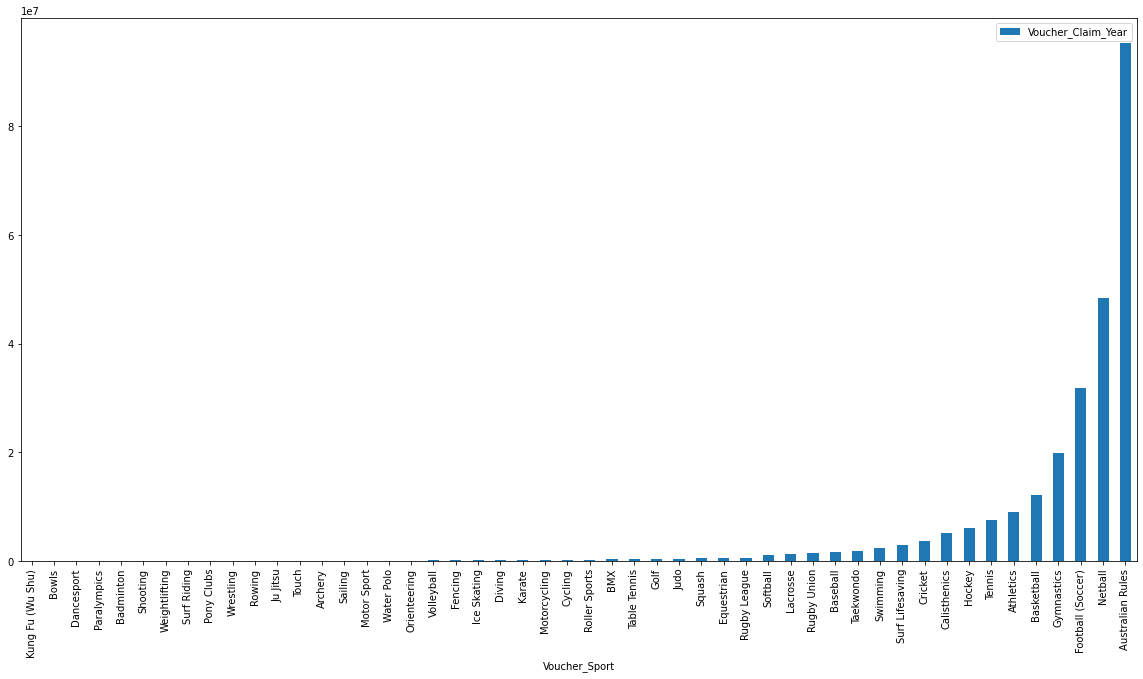

In [17]:
Sport_result.sort_values(by=['Voucher_Claim_Year']).plot.bar(y='Voucher_Claim_Year',figsize=(20,10))

<AxesSubplot:xlabel='Voucher_Sport'>

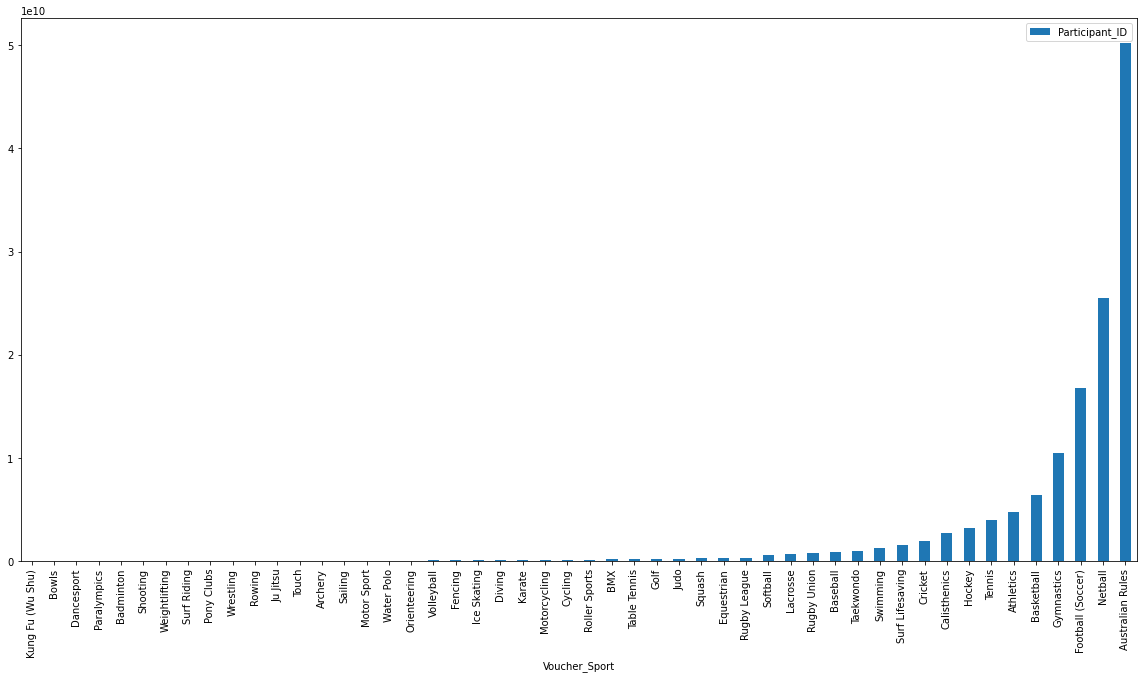

In [121]:
Sport_result.sort_values(by=['Voucher_Claim_Year']).plot.bar(y='Participant_ID',figsize=(20,10))

Australian rules stand out from all other sports with the amount of 95204301 for voucher claim and number of participants of 50181823236.

# Are some sports more popular in different parts of the state?

In [24]:
p = df.groupby(["Participant_LGA","Voucher_Sport"])
p.count()

Participant_ID  Participant_Suburb  \
Participant_LGA Voucher_Sport                                          
ADELAIDE        Athletics                     16                  16   
                Australian Rules             130                 130   
                Baseball                       1                   1   
                Basketball                     4                   4   
                Calisthenics                   1                   1   
...                                          ...                 ...   
YORKE PENINSULA Motorcycling                   2                   2   
                Netball                      313                 313   
                Surf Lifesaving                4                   4   
                Taekwondo                     87                  87   
                Tennis                         9                   9   

                                  Club_Previous_Member  \
Participant_LGA Voucher_Sport                            
ADELAIDE        Athletics                           16   
                Australian Rules                   130   
                Baseball                             1   
                Basketball                           4   
                Calisthenics                         1   
...                                                ...   
YORKE PENINSULA Motorcycling                         2   
                Netball                            313   
                Surf Lifesaving                      4   
                Taekwondo                           87   
                Tennis                               9   

                                  Participant_ATSI_Indicator  \
Participant_LGA Voucher_Sport                                  
ADELAIDE        Athletics                                 16   
                Australian Rules                         130   
                Baseball                                   1   
                Basketball                                 4   
                Calisthenics                               1   
...                                                      ...   
YORKE PENINSULA Motorcycling                               2   
                Netball                                  313   
                Surf Lifesaving                            4   
                Taekwondo                                 87   
                Tennis                                     9   

                                  Participant_CALD_Indicator  Participant_Sex  \
Participant_LGA Voucher_Sport                                                   
ADELAIDE        Athletics                                 16               16   
                Australian Rules                         130              130   
                Baseball                                   1                1   
                Basketball                                 4                4   
                Calisthenics                               1                1   
...                                                      ...              ...   
YORKE PENINSULA Motorcycling                               2                2   
                Netball                                  313              313   
                Surf Lifesaving                            4                4   
                Taekwondo                                 87               87   
                Tennis                                     9                9   

                                  Voucher_Value  Club_Name  \
Participant_LGA Voucher_Sport                                
ADELAIDE        Athletics                    16         16   
                Australian Rules            130        130   
                Baseball                      1          1   
                Basketball                    4          4   
                Calisthenics                  1          1   
...                  

In [25]:
maxValueIndex = p.idxmax()
print(maxValueIndex)

                                  Participant_ID  Voucher_Value  \
Participant_LGA Voucher_Sport                                     
ADELAIDE        Athletics                  76922            830   
                Australian Rules           76968            831   
                Baseball                     837            837   
                Basketball                 76876            948   
                Calisthenics                 893            893   
...                                          ...            ...   
YORKE PENINSULA Motorcycling               86798          86798   
                Netball                   127466           1018   
                Surf Lifesaving           111691         111689   
                Taekwondo                 127446          18911   
                Tennis                     93142          93139   

                                  Voucher_Claim_Year  
Participant_LGA Voucher_Sport                         
ADELAIDE        At

<AxesSubplot:xlabel='Voucher_Sport', ylabel='Participant_LGA'>

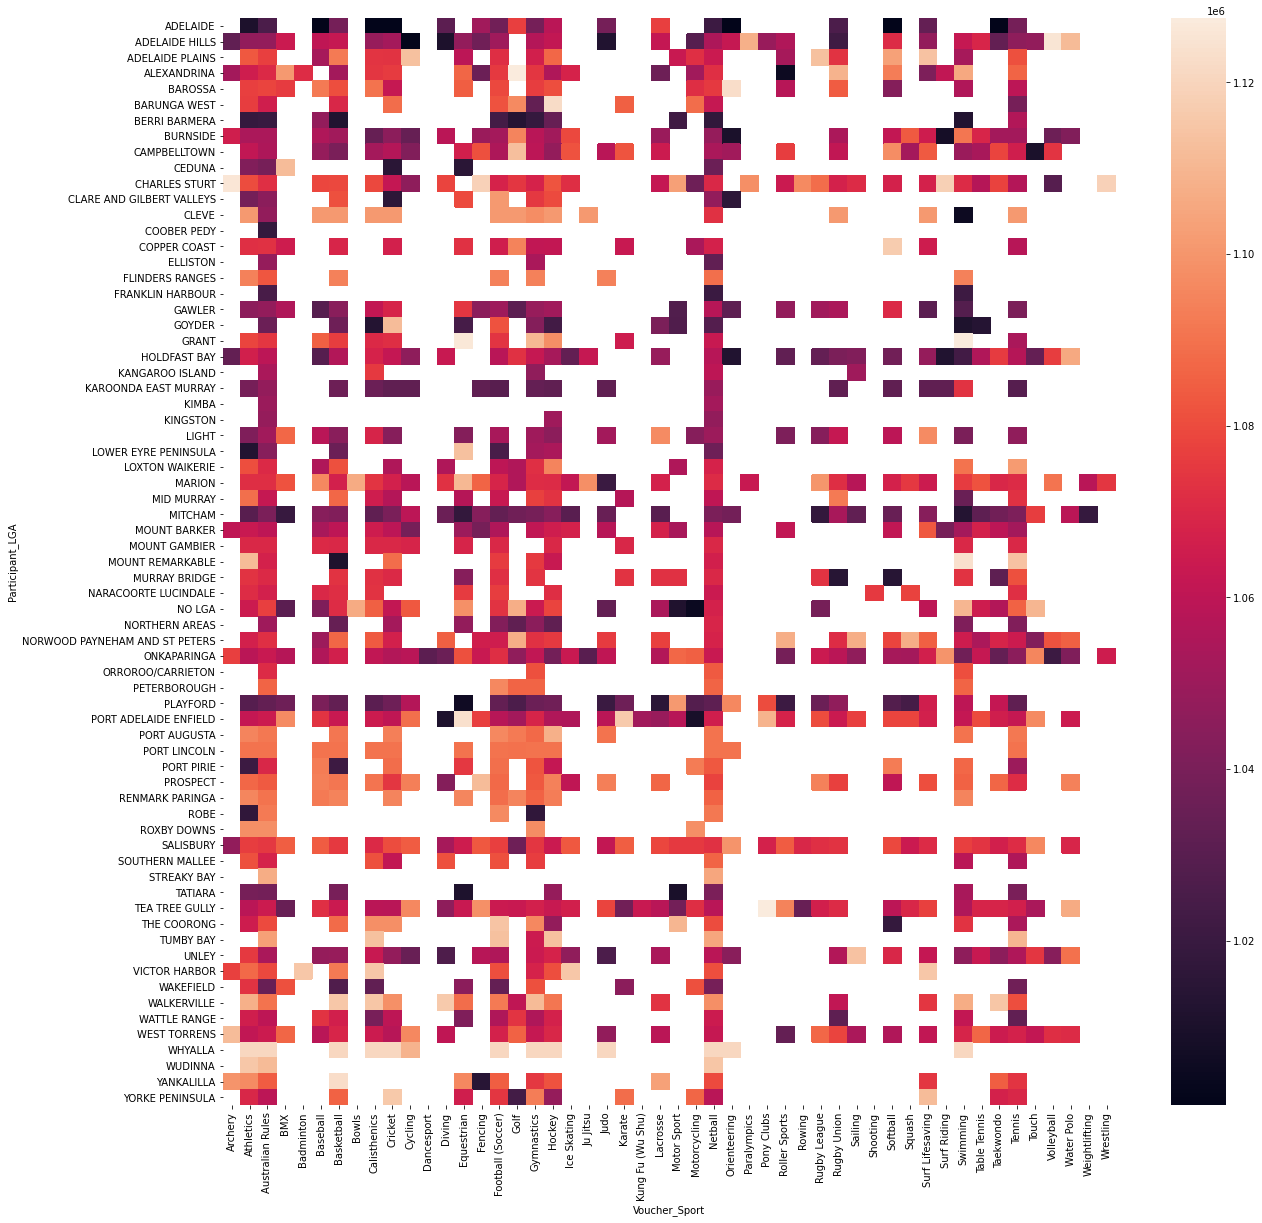

In [120]:
popularity = df.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Participant_ID')
plt.subplots(figsize=(20,20))
sns.heatmap(popularity)

From the graph above, we can tell that most of the participant LGA preferred Australian Rules and Netball. However, there are some exception, for example York Peninsula LGA preferred Golf and Robe LGA preferred Archery and Gymnastics.

# Are any LGAs over/under represented in their use of vouchers?
 

In [118]:
new = sa_vouchers_scores.groupby(by=["Participant_LGA"]).sum()
new.head(10)

,Participant_ID,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
Participant_LGA,,,,,,,,
ADELAIDE,310865991,15100,608800,263948.0,263948.0,312872.0,305926.0,5921012.0
ADELAIDE HILLS,4999089570,237570,9587113,5150748.0,5150748.0,5122212.0,5141236.0,183586356.0
ADELAIDE PLAINS,965207934,44841,1812362,0.0,0.0,0.0,0.0,0.0
ALEXANDRINA,3190623227,148790,6005318,2979000.0,2979000.0,2886651.0,2940273.0,70581447.0
BAROSSA,3095849265,143335,5793782,2954472.0,2954472.0,2865378.0,2922858.0,63728076.0
BARUNGA WEST,354996867,15785,671336,326673.0,326673.0,313020.0,317682.0,821511.0
BERRI BARMERA,1515312076,74260,2995594,0.0,0.0,0.0,0.0,0.0
BURNSIDE,2332197137,110650,4461273,2310372.0,2310372.0,2412170.0,2392253.0,93317784.0
CAMPBELLTOWN,2712164134,128275,5174948,2514376.5,2514376.5,2497691.0,2510526.0,249153020.0


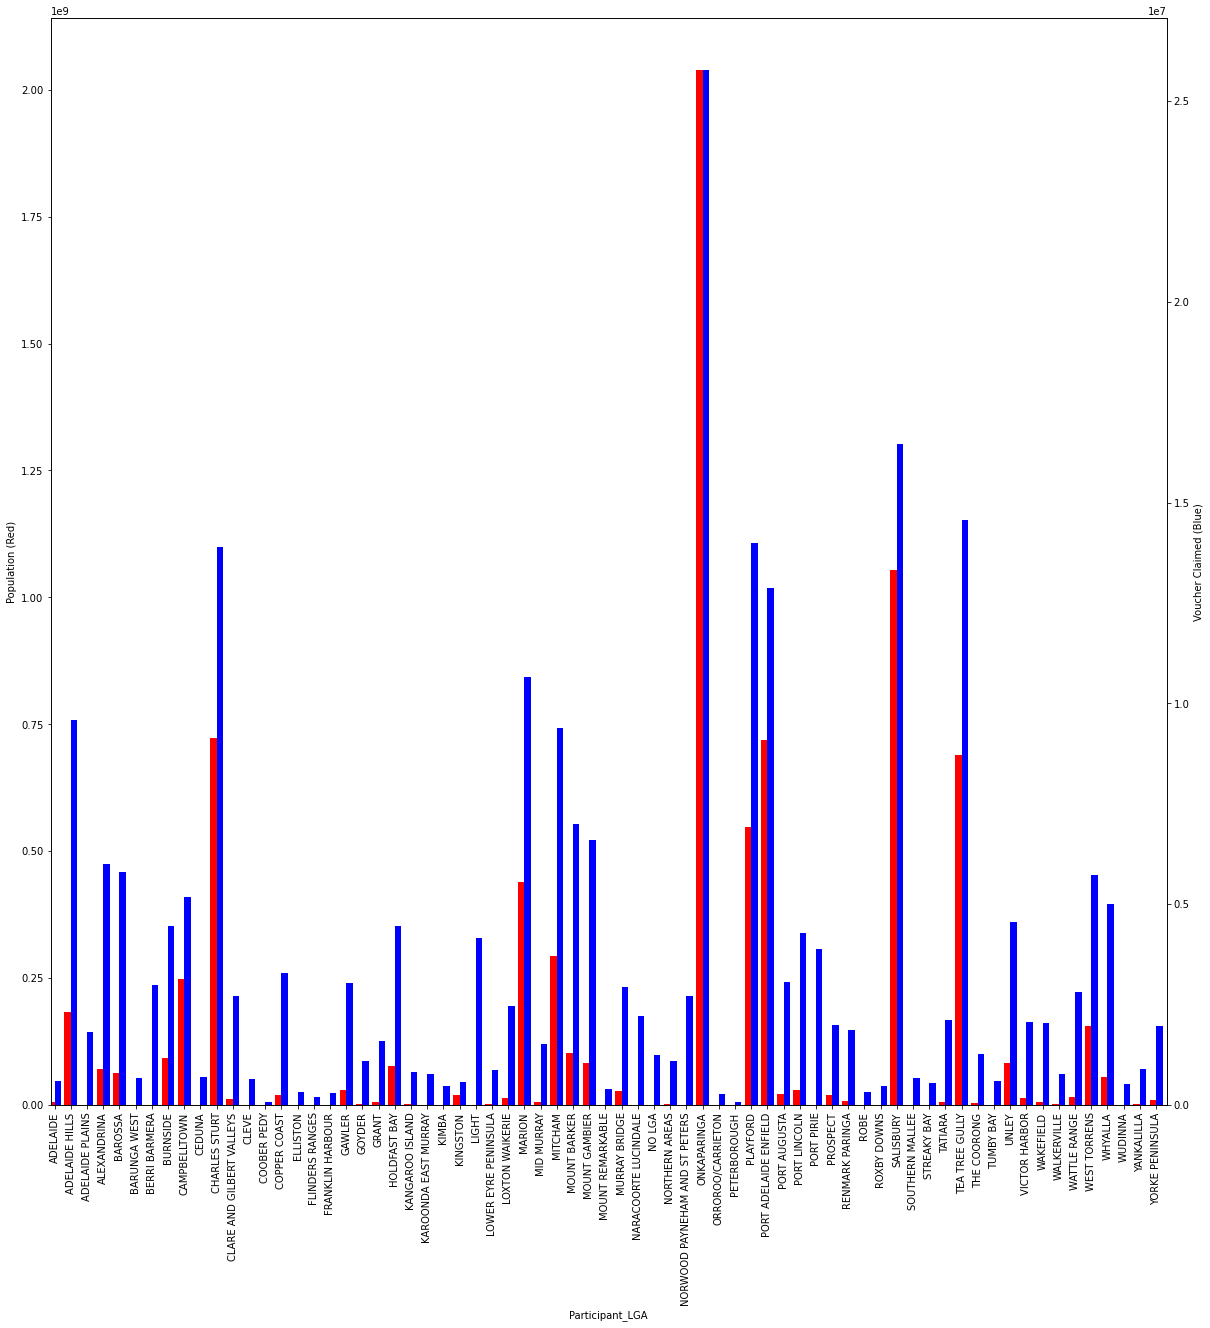

In [119]:
fig = plt.figure()
ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

new.Population.plot(kind='bar', color='red', ax=ax, width=width, position=1)
new.Voucher_Claim_Year.plot(kind='bar', color='blue', ax=ax2,  width=width, position=0)

ax.set_ylabel('Population (Red)')
ax2.set_ylabel('Voucher Claimed (Blue)')

fig.set_figwidth(20)
fig.set_figheight(20)

plt.show()

As we observe from the graph above, most of the vouchers use were over represented in every participant LGA except Onkaparinga which was perfectly balanced between the use of voucher and the population. Althought the vouchers used in some participant LGA was high, the population was very low in number. Suspicious!

# Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [113]:
vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
relationship = vouchers.join(LGA_scores, on='Participant_LGA')
relationship.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [114]:
print(relationship['IEO'].corr(relationship['Voucher_Claim_Year']))
print(relationship['IER'].corr(relationship['Voucher_Claim_Year']))
print(relationship['IRSAD'].corr(relationship['Voucher_Claim_Year']))
print(relationship['IRSD'].corr(relationship['Voucher_Claim_Year']))
print(relationship['Population'].corr(relationship['Voucher_Claim_Year']))

-0.013838514534880178
-0.013838514534880178
-0.013682729139576367
-0.014744075354454145
0.00992287711590659


After the calculation between voucher claim year and SEIFA measures, the correlation between both dataframe is between 0.01 and -0.01. We can say that there is no relationship between these two dataframe.

In [115]:
relationship["Voucher_Completion_Date"] = pd.to_datetime(relationship["Voucher_Completion_Date"])
relationship["Voucher_Completion_Date"] = relationship["Voucher_Completion_Date"].dt.strftime('%Y%m%d%H%M%S')
relationship['Voucher_Completion_Date'] = relationship['Voucher_Completion_Date'].astype(np.float64)
print(relationship.dtypes)

Participant_ID                  int64
Participant_Suburb             object
Club_Previous_Member           object
Participant_ATSI_Indicator     object
Participant_CALD_Indicator     object
Participant_Sex                object
Voucher_Value                   int64
Club_Name                      object
Voucher_Sport                  object
Participant_LGA                object
Participant_Electorate         object
Voucher_Completion_Date       float64
Voucher_Claim_Year              int64
IEO                           float64
IER                           float64
IRSAD                         float64
IRSD                          float64
Population                    float64
dtype: object


In [116]:
print(relationship['IEO'].corr(relationship['Voucher_Completion_Date']))
print(relationship['IER'].corr(relationship['Voucher_Completion_Date']))
print(relationship['IRSAD'].corr(relationship['Voucher_Completion_Date']))
print(relationship['IRSD'].corr(relationship['Voucher_Completion_Date']))
print(relationship['Population'].corr(relationship['Voucher_Completion_Date']))

0.010168893219241722
0.010168893219241722
0.013864632580963274
0.01241931543816911
0.015617294005954971


After the calculation between voucher completion date and SEIFA measures, the correlation between both dataframe is as low as 0.01. In conclusion, there is no relationship between these two dataframe.

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [8]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [16]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head(10)

<ipython-input-16-37d5590444c4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
5,2000007910,NCX1PDN3,8,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Salisbury,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
6,2000004074,P4RJYRWF,9,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Caloundra,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
7,2000006519,KBWK8ZDS,9,NaN,No,*Other,Wynnum & District Horse & Pony Club Inc,Tingalpa,Brisbane (C),Lytton,Capalaba,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
8,2000004081,ERXPFH2D,10,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Caloundra,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0
9,2000013359,2VWMJK9G,11,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Sippy Downs,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0


In [17]:
qld_vouchers_scores.describe()

,Application Number,Child Age (at time of Application),Gender,Total Payment,IEO,IER,IRSAD,IRSD
count,9.507000e+03,9507.000000,0.0,9507.000000,8988.000000,8988.000000,8988.000000,8988.000000
mean,2.000007e+09,10.055854,NaN,143.990190,1003.907321,1003.907321,996.992101,999.869381
std,3.958950e+03,3.049306,NaN,17.364601,22.202035,22.202035,40.146735,34.453046
min,2.000000e+09,5.000000,NaN,5.000000,947.000000,947.000000,908.000000,917.000000
25%,2.000004e+09,8.000000,NaN,150.000000,1001.000000,1001.000000,965.000000,971.000000
50%,2.000007e+09,10.000000,NaN,150.000000,1008.000000,1008.000000,1001.000000,1007.000000
75%,2.000010e+09,12.000000,NaN,150.000000,1018.000000,1018.000000,1016.000000,1014.000000
max,2.000018e+09,17.000000,NaN,150.200000,1049.000000,1049.000000,1057.000000,1048.000000


In [10]:
qld_vouchers_scores.isna().sum()

Application Number                        0
Voucher Number                            0
Child Age (at time of Application)        0
Gender                                 9507
Has your child played sport before?       4
Participation Activity                    0
Club Name                                 0
Club Suburb/Town                          0
Club Local Government Area Name           0
Club State Electoral District  Name       0
Parent Suburb/Town                        0
Total Payment                             0
LGA                                       0
IEO                                     519
IER                                     519
IRSAD                                   519
IRSD                                    519
dtype: int64

We can see that most of the people did not fill in their gender.

In [11]:
qld_vouchers_scores.dtypes

Application Number                       int64
Voucher Number                          object
Child Age (at time of Application)       int64
Gender                                 float64
Has your child played sport before?     object
Participation Activity                  object
Club Name                               object
Club Suburb/Town                        object
Club Local Government Area Name         object
Club State Electoral District  Name     object
Parent Suburb/Town                      object
Total Payment                          float64
LGA                                     object
IEO                                    float64
IER                                    float64
IRSAD                                  float64
IRSD                                   float64
dtype: object

In [13]:
qld_vouchers_scores['Participation Activity'].unique()

array(['*Other', 'Archery', 'Athletics', 'Australian Football',
       'Baseball', 'Basketball', 'BMX Bicycle Motocross', 'Body Boarding',
       'Bowls Lawn', 'Boxing', 'Broomball', 'Bushwalking', 'Calisthenics',
       'Canoeing Outrigger', 'Cheerleading', 'Cricket', 'Cycling',
       'Dancesport', 'Disability Sports', 'Dragon Boating', 'Equestrian',
       'Football (Soccer)', 'Futsal', 'Golf', 'Gymnastics', 'Hockey',
       'Ice Hockey', 'Ice Skating', 'Inline Hockey', 'Ju Jitsu', 'Judo',
       'Karate', 'Karting', 'Kayaking', 'Life Saving Surf',
       'Mixed Martial Arts', 'Motor Cycling', 'Netball', 'Oztag',
       'Parkour', 'Polocrosse', 'Pony Club', 'Riding for the Disabled',
       'Rock Climbing', 'Roller Sports', 'Rowing', 'Rugby League',
       'Rugby Union', 'Sailing', 'Shooting', 'Skipping', 'Softball',
       'Squash', 'Surfing', 'Swimming', 'Swimming Synchronised',
       'Table Tennis', 'Taekwondo', 'T-Ball', 'Tennis', 'Tenpin Bowling',
       'Touch', 'Trail Bike R

<AxesSubplot:xlabel='Participation Activity', ylabel='Club Local Government Area Name'>

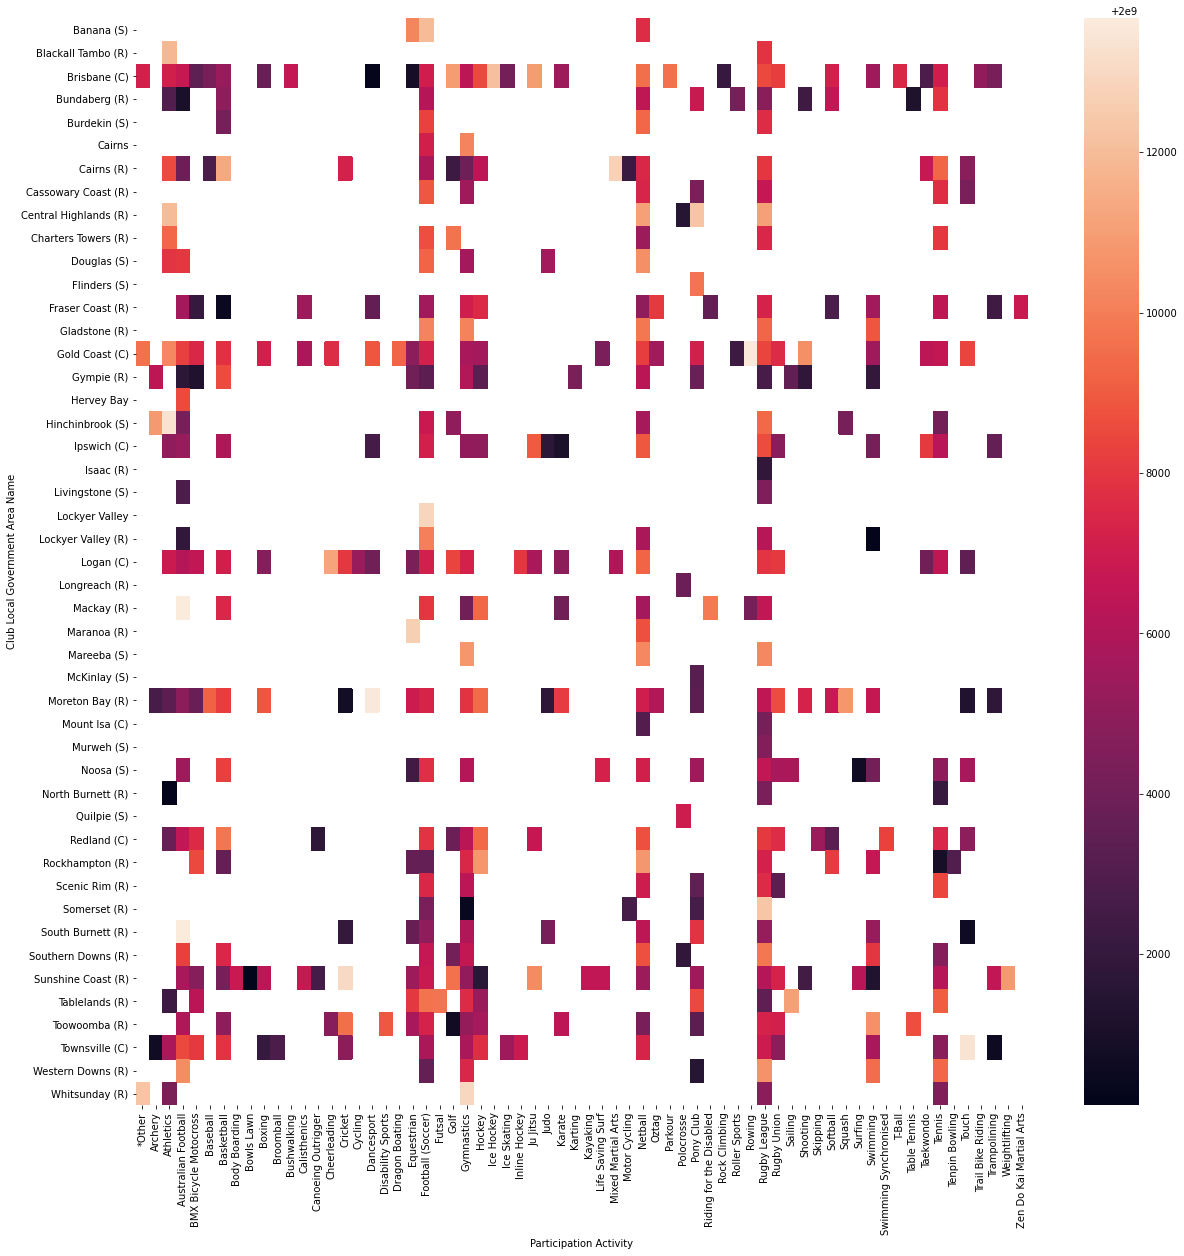

In [14]:
heat = qld_vouchers.pivot_table(index='Club Local Government Area Name', columns='Participation Activity', values='Application Number')
plt.subplots(figsize=(20,20))
sns.heatmap(heat)

The heatmap shows the preferred activity across different LGA in Queensland. Football, netballand rugby league seems to have more participants compare to the other activities.

In [19]:
Activity_result = qld_vouchers.groupby(by=["Participation Activity"]).sum()
print(Activity_result.shape)
Activity_result.describe()

(66, 4)


,Application Number,Child Age (at time of Application),Gender,Total Payment
count,6.600000e+01,66.000000,66.0,66.000000
mean,2.880919e+11,1448.500000,0.0,20741.132424
std,9.048568e+11,4523.825707,0.0,65374.217019
min,2.000000e+09,5.000000,0.0,30.000000
25%,6.000012e+09,36.500000,0.0,382.500000
50%,1.800005e+10,90.500000,0.0,1255.000000
75%,7.850024e+10,414.750000,0.0,5341.600000
max,5.564021e+12,27550.000000,0.0,398615.000000


<AxesSubplot:xlabel='Participation Activity'>

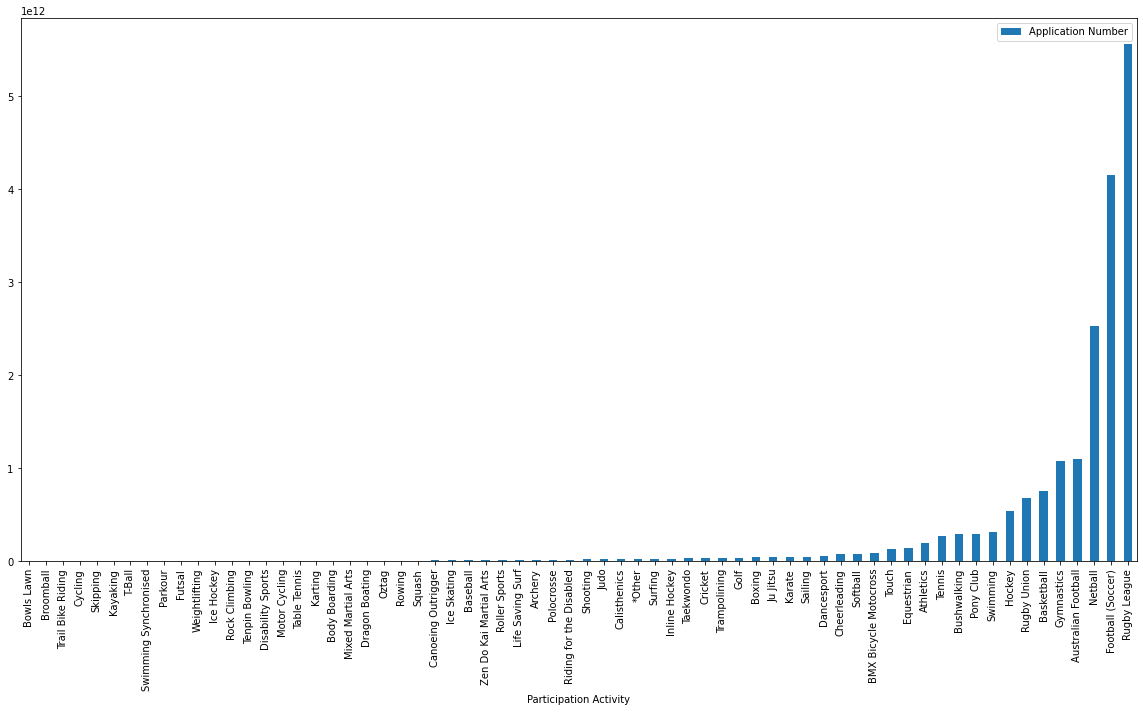

In [20]:
Activity_result.sort_values(by=['Application Number']).plot.bar(y='Application Number',figsize=(20,10))

In [23]:
Activity_result.sort_values(by=['Application Number']).tail()

,Application Number,Child Age (at time of Application),Gender,Total Payment
Participation Activity,,,,
Gymnastics,1078003344459,4301,0.0,78945.32
Australian Football,1096003618534,5682,0.0,76902.00
Netball,2526009731937,13714,0.0,185062.00
Football (Soccer),4148014168157,20547,0.0,302624.00
Rugby League,5564021263435,27550,0.0,398615.00


From the bar graph, we prove that our hypothesis in heatmap is correct and rugby league is the most popular and preferred activity with a number of 5564021263435 application among all.

In [25]:
LGA_result = qld_vouchers.groupby(by=["Club Local Government Area Name"]).sum()
print(LGA_result.shape)
LGA_result.describe()

(47, 4)


,Application Number,Child Age (at time of Application),Gender,Total Payment
count,4.700000e+01,47.000000,47.0,47.000000
mean,4.045546e+11,2034.063830,0.0,29125.845532
std,7.497672e+11,3746.801316,0.0,55098.229738
min,2.000002e+09,9.000000,0.0,45.000000
25%,1.900007e+10,86.500000,0.0,1338.000000
50%,8.400029e+10,396.000000,0.0,5162.000000
75%,4.460013e+11,2410.500000,0.0,30812.500000
max,3.400013e+12,16718.000000,0.0,250576.000000


<AxesSubplot:xlabel='Club Local Government Area Name'>

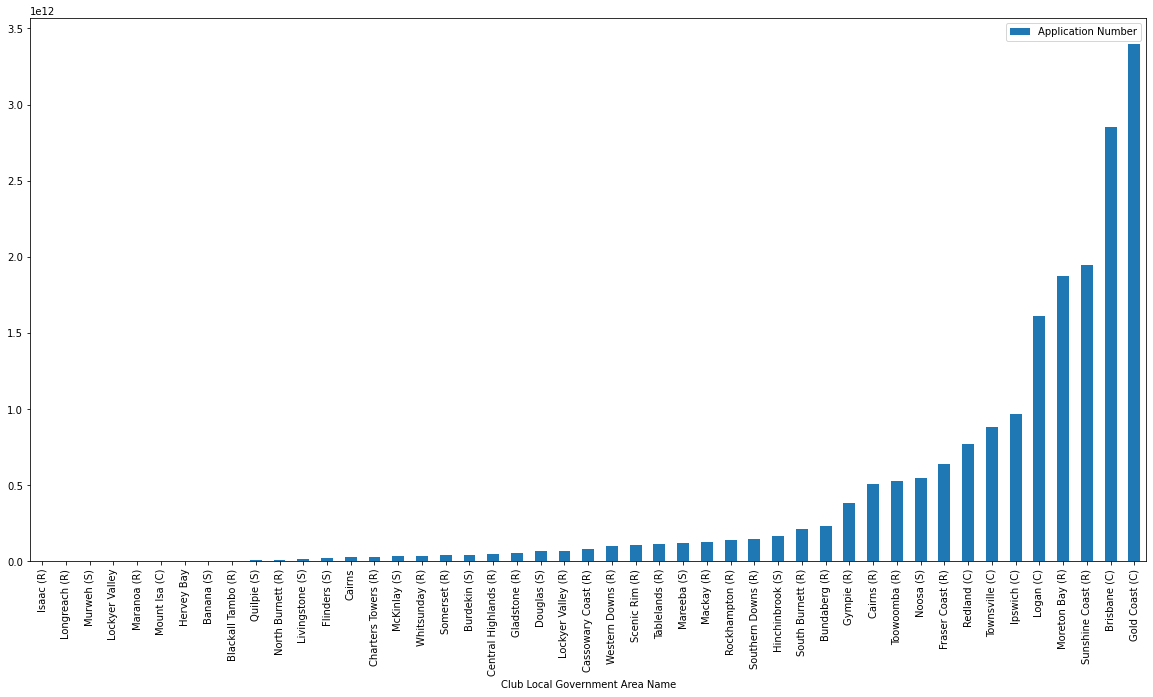

In [26]:
LGA_result.sort_values(by=['Application Number']).plot.bar(y='Application Number',figsize=(20,10))

In [27]:
LGA_result.sort_values(by=['Application Number']).tail()

,Application Number,Child Age (at time of Application),Gender,Total Payment
Club Local Government Area Name,,,,
Logan (C),1610006238931,8141,0.0,117656.0
Moreton Bay (R),1876006440020,9492,0.0,137573.9
Sunshine Coast (R),1948005901616,9856,0.0,141063.7
Brisbane (C),2850010672199,14423,0.0,209336.5
Gold Coast (C),3400013156911,16718,0.0,250576.0


After that, the bar graph above shows that Gold Coast have the highest application number followed by Brisbane and Sunshine Coast with the application number of 3400013156911, 2850010672199 and 1948005901616 respectively.

In [28]:
Age_result = qld_vouchers.groupby(by=["Child Age (at time of Application)"]).sum()
print(Age_result.shape)
Age_result.describe()

(13, 3)


,Application Number,Gender,Total Payment
count,1.300000e+01,13.0,13.000000
mean,1.462621e+12,0.0,105301.133846
std,6.127253e+11,0.0,44347.577846
min,2.360008e+11,0.0,17005.000000
25%,1.208004e+12,0.0,83896.920000
50%,1.592006e+12,0.0,113978.500000
75%,1.884006e+12,0.0,137274.400000
max,2.142008e+12,0.0,155491.510000


<AxesSubplot:xlabel='Child Age (at time of Application)'>

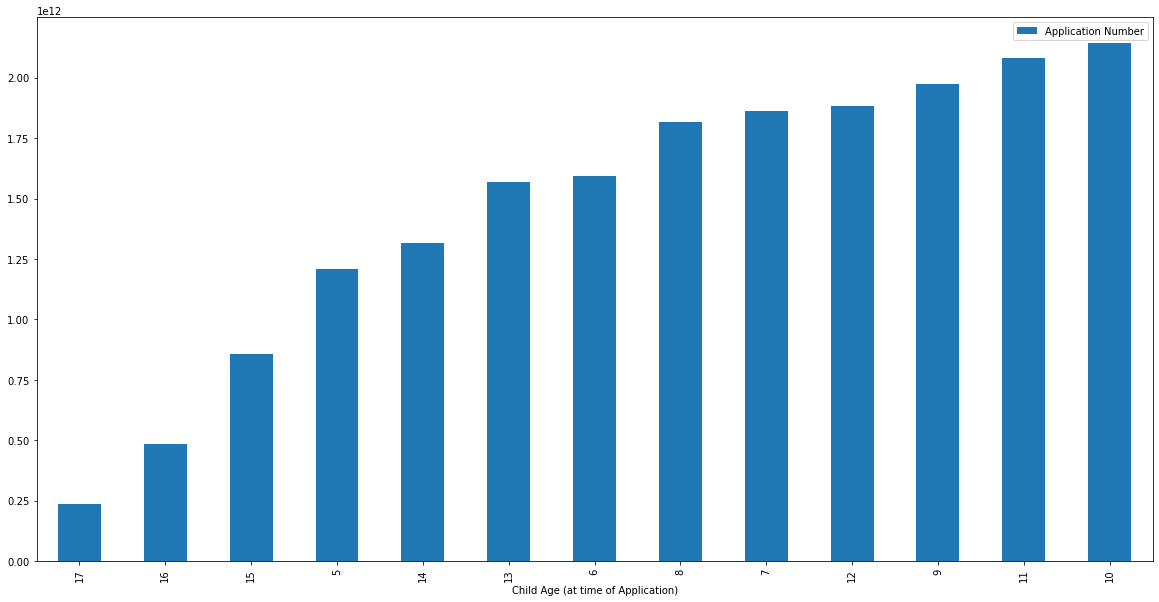

In [29]:
Age_result.sort_values(by=['Application Number']).plot.bar(y='Application Number',figsize=(20,10))

In [30]:
Age_result.sort_values(by=['Application Number']).tail()

,Application Number,Gender,Total Payment
Child Age (at time of Application),,,
7,1860006518630,0.0,132361.21
12,1884006474567,0.0,137274.40
9,1972007035203,0.0,142967.55
11,2080007532057,0.0,151180.05
10,2142007628793,0.0,155491.51


Furthermore, child age of 10 at time of application has the most application number which is 2142007628793 compare to other child age.

In [30]:
qld_vouchers_scores['Club Local Government Area Name'] = qld_vouchers_scores['Club Local Government Area Name'].rank(method='dense')-1
qld_vouchers_scores['Club Local Government Area Name'] = qld_vouchers_scores['Club Local Government Area Name'].astype(np.float16)

In [35]:
print(qld_vouchers_scores['IEO'].corr(qld_vouchers_scores['Club Local Government Area Name']))
print(qld_vouchers_scores['IER'].corr(qld_vouchers_scores['Club Local Government Area Name']))
print(qld_vouchers_scores['IRSAD'].corr(qld_vouchers_scores['Club Local Government Area Name']))
print(qld_vouchers_scores['IRSD'].corr(qld_vouchers_scores['Club Local Government Area Name']))

0.10977617844892426
0.10977617844892426
-0.2774187894887942
-0.1942297094432004
-0.026498388187240596


We can say that there are no relationship between the Club Local Government Area Name and Seifa measures since the correlation range are between 0.11 and -0.28.

In [38]:
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].rank(method='dense')-1
qld_vouchers_scores['Participation Activity'] = qld_vouchers_scores['Participation Activity'].astype(np.float16)

In [39]:
print(qld_vouchers_scores['Child Age (at time of Application)'].corr(qld_vouchers_scores['Application Number']))
print(qld_vouchers_scores['Club Local Government Area Name'].corr(qld_vouchers_scores['Application Number']))
print(qld_vouchers_scores['Participation Activity'].corr(qld_vouchers_scores['Application Number']))

-0.026498388187240596
-0.0818027327805674
0.0579222680018169


There are also no clear correlation between application number and child age, club local government area name as well as participation activity. This is due the the correlation is as low as 0.1.

In the nutshell, rugby league is the most preferred activity for people age of 10 in Queensland.